In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
import sqlite3

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
connection = sqlite3.connect('database.sqlite')
amazon_data = pd.read_sql_query('SELECT * from reviews where score != 3',connection)
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
def scorePosNeg(score):
    if(score<3):
        return 'negative'
    else:
        return 'positive'

In [4]:
score = amazon_data.Score
posneg = score.map(scorePosNeg)
amazon_data.Score = posneg
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
amazon_data.shape

(525814, 10)

# Exploratory Data Analysis
## Data Cleaning: Deduplication

In [6]:
#Sorting the data with ProductId
sorted_data = amazon_data.sort_values('ProductId',axis=0,ascending=True,inplace=False)

In [7]:
#Removing the data for reviews on similar products with same review
final_data = sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)

In [8]:
final_data.shape

(364173, 10)

In [9]:
#Removing the data where HelpfulnessNumerator > HelpfulnessDenominator
cleaned_data = final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]
cleaned_data.shape

(364171, 10)

In [10]:
cleaned_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [11]:
sort = cleaned_data.sort_values('Id',kind='quicksort',ascending = True)
sort[(sort.Id>=150450)&(sort.Id<=150550)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138675,150492,B000LQJKGS,ABFOAYZA2UHD3,J. Malnar,0,0,positive,1172016000,"just as with griotte, its a great filling",in a chockie coating that should be so much be...
138676,150493,0006641040,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",71,72,positive,1096416000,Read it once. Read it twice. Reading Chicken S...,"These days, when a person says, ""chicken soup""..."
138677,150494,0006641040,AYZ0PR5QZROD1,Mother of 3 girls,3,3,positive,1173312000,Family favorite,All of my children love this book. My first g...
138678,150496,0006641040,A3KKR87BJ0C595,"Gretchen Goodfellow ""Lover of children's lit""",3,3,positive,1111363200,"You'll use it once, you'll use it twice",One of my earliest memories is of this book. ...
138679,150497,0006641040,A1HKYQOFC8ZZCH,"Maria Apolloni ""lanarossa""",2,2,negative,1334707200,"The story is great, the softcover book is disa...",I give five stars to the Maurice Sendak story....
138680,150498,0006641040,A3SJWISOCP31TR,R. J. Wells,2,2,positive,1176336000,A Gem of a Book,This is a wonderful little book. I loved it 40...
138681,150499,0006641040,A3E7R866M94L0C,"L. Barker ""simienwolf""",2,2,positive,1065830400,Can't explain why,This book has been a favorite of mine since I ...
138682,150500,0006641040,A1IJKK6Q1GTEAY,A Customer,2,2,positive,1009324800,It Was a favorite!,This was a favorite book of mine when I was a ...
138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
138684,150502,0006641040,AVFMJ50HNO21J,Jane Doe,1,1,positive,1324944000,"Tiny little book, Wonderful little rhymes.",This copy is smaller than I expected (mostly b...


In [12]:
#Removing the reviews for book products
cleaned_data = sort.drop(sort.index[(sort.Id>=150493)&(sort.Id<=150529)])
cleaned_data[(cleaned_data.Id>=150450)&(cleaned_data.Id<=150650)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138675,150492,B000LQJKGS,ABFOAYZA2UHD3,J. Malnar,0,0,positive,1172016000,"just as with griotte, its a great filling",in a chockie coating that should be so much be...
138710,150530,B000VHI0MC,A3OTW5NH8GHL8X,"Oracle-Ace ""oracle-ace""",4,4,positive,1181088000,The Best Oats That I Have Found (and I've trie...,This is a great tasting oat product. I combine...
138711,150531,B000VHI0MC,A1IN5OPG8SW8Q7,"Frecie Magdirila ""F""",2,2,positive,1259539200,I LOVE THIS OATMEAL,"I usually hate oatmeal, but I love Bob's Red M..."
138712,150532,B000VHI0MC,A1QK0XCAPHIW1L,Flush Barrett-Browning,2,2,positive,1235865600,As good as it gets....,Bob's Oats are as good as oats get. I use the...
138713,150533,B000VHI0MC,A12QCF4W5ICU8G,M. Golden,1,1,negative,1319932800,overpriced,I just checked at Publix and it is $4.99 there...
138714,150534,B000VHI0MC,A1L7N67449CMER,Joann Goldberg,1,1,positive,1259280000,BEST OATS EVER,"LOOK NO FURTHER IF YOU WANT THE BEST TASTE, BE..."
138715,150535,B000VHI0MC,A1RMBE0PZQGAM,"Karl Langer ""Karl""",3,4,positive,1222819200,VERY good,"As chewy as steel-cut oats, but the texture is..."
138716,150536,B000VHI0MC,A3U1W0WBKZQRY5,Caroline Graettinger,0,0,positive,1318204800,My favorite breakfast,My husband and I love Bob's Red Mill extra thi...
138717,150537,B000VHI0MC,A2VE8DHZ2CFID,M. Muncie,0,0,positive,1268352000,MEM,I am not a big fan of oatmeal. This is the exc...
138718,150538,B000VHI0MC,A1SN1VBO9D7OLY,S. Goldsbury,1,19,negative,1254873600,Gluten free caution,Be careful when you are in Amazon's gluten fre...


In [13]:
cleaned_data.shape

(364137, 10)

# Text Preprocessing: Stemming, Lemmatization,StopWords

In [3]:
#Importing the required modules for Text Preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
#Set of all Stop Words in English
stop = set(stopwords.words('english'))
print(stop)

{'out', 'but', 'or', 'itself', 'a', 'through', 'than', 'did', 'needn', 're', 'and', 'himself', 'have', 'so', "you've", "you'd", 't', "shan't", 'why', 'more', 'just', 'won', 'aren', 'herself', 'same', 'who', 'themselves', 'off', 'll', 'about', 'at', 'on', 'an', 'yourselves', 'that', 'again', 'being', 'were', "weren't", 'd', 'shan', "haven't", 'own', 'they', 'y', 'ain', "mustn't", 'hadn', 'before', "needn't", 'his', 'been', 'then', 'over', 'now', 'isn', "mightn't", 'where', 'because', 'we', 'until', 'their', "that'll", "isn't", 'shouldn', 'there', "don't", 'weren', 'down', 'by', 'him', 'can', 'into', 'does', 'few', 'those', "should've", 'how', "aren't", "couldn't", 'are', "didn't", 'during', 'nor', 'with', 'in', 've', "wasn't", 'which', 'these', 'i', 'hers', 'doesn', "it's", 'after', 'her', "you're", 'was', 'be', 'me', 'ours', 'while', 'doing', 'whom', 'only', 'yourself', 'ma', 'other', 'to', 'is', 'between', "doesn't", 'you', 'my', 'didn', 'very', 'this', 'your', 'once', 'each', 'he', "

In [16]:
#Building the SnowBallStemmer
sno_stem = SnowballStemmer('english')
sno_stem.stem('helpful')

'help'

In [10]:
import re
#Removing Html tags
def cleanHtml(sentence):
    cleanText = re.sub('<.*?>','',sentence)
    return cleanText
#Removing Punctuations
def cleanPunc(word):
    cleaned = re.sub(r'[#|!|?|\'|@|"]','',word)
    cleaned = re.sub(r'[,|.|(|)|\|/]',' ',word)
    return cleaned

In [18]:
#Actual Preprocessing
stemmed_word = ''
i = 0
str1 = ' '
final_string=[]
all_positive_words=[]
all_negative_words=[]
stemmed_word=''
for sentence in cleaned_data.Text.values:     
    filtered_sentence=[]                    #Values to be stored after filtering
    sent = cleanHtml(sentence)              #Cleaning the html tags from the reviews
    for word in sentence.split():           #Looping on each word of the sentence
        for cleaned_word in cleanPunc(word).split():        #Removing any punctuations
            if((cleaned_word.isalpha()) & (len(cleaned_word)>2)):   
                if(cleaned_word.lower() not in stop):
                    stemmed_word = (sno_stem.stem(cleaned_word.lower())).encode('utf8')    #Converting to lowercase 
                    filtered_sentence.append(stemmed_word)             
                    if (cleaned_data.Score.values)[i] == 'positive':
                        all_positive_words.append(stemmed_word)                #Inserting all the positive reviews
                    if (cleaned_data.Score.values)[i] == 'negative':
                        all_negative_words.append(stemmed_word)                #Inserting all the negative reviews
                else:
                    continue
            else:
                continue
    str1 = b" ".join(filtered_sentence)             #Converting to binary string format
    final_string.append(str1)
    i=i+1

In [19]:
cleaned_data['CleanedText'] = final_string         #Inserting the cleaned text to a new column

In [20]:
#Saving data to a new csv file 
cleaned_data.to_csv('final_data.csv',index=False)

In [2]:
#Loading the data for all the future uses
cleaned_data = pd.read_csv('final_data.csv')
cleaned_data = cleaned_data.drop([31393,294985,341395])

In [3]:
pos_rev = cleaned_data[cleaned_data.Score=='positive']     #Filtering the positive reviews
neg_rev = cleaned_data[cleaned_data.Score=='negative']     #Filtering the negative reviews
print(pos_rev.shape)
neg_rev.shape

(307029, 11)


(57105, 11)

In [4]:
#Balancing the positive and negatie reviews
pos_rev = pos_rev[:20000]           #Selecting 20000 positive reviews    
neg_rev = neg_rev[:20000]           #Selecting 20000 negative reviews
balanced_data = pd.concat([pos_rev,neg_rev])          #Concating positive and negative reviews
balanced_data.shape

(40000, 11)

#### Sorting data as per Time Stamps 

In [5]:
#Sorting the data as per TimeStamp
balanced_sorted_data = balanced_data.sort_values(by='Time',kind='quicksort',ascending=True,axis=0,inplace=False).reset_index(drop=True)
balanced_sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,961718400,Great Product,This was a really good idea and the final prod...,b'realli good idea final product outstand use ...
1,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,b'receiv shipment could hard wait tri product ...
2,30629,B00008RCMI,A19E94CF5O1LY7,Andrew Arnold,0,0,positive,1067040000,"I've chewed this gum many times, but used?","Nothing against the product, but it does bothe...",b'noth product bother link top page buy use ch...
3,30630,B00008RCMI,A284C7M23F0APC,A. Mendoza,0,0,positive,1067040000,Best sugarless gum ever!,I love this stuff. It is sugar-free so it does...,b'love stuff rot gum tast good go buy gum get'
4,131233,B00004RAMX,A1PYZPS1QYR036,"Kazantzakis ""hinterlands""",5,8,negative,1067385600,Woodstream Gopher Trap 0610,This is a poor excuse for a gopher trap. I hav...,b'poor excus gopher trap lot gopher use trap r...


In [6]:
balanced_data_score = balanced_sorted_data.Score
balanced_data_score.shape

(40000,)

In [7]:
balanced_data_score.value_counts()

positive    20000
negative    20000
Name: Score, dtype: int64

In [8]:
#Dividing the data to train and test data
balanced_train_data = balanced_sorted_data.iloc[0:28000,:]
balanced_train_label = balanced_data_score[:28000]
balanced_test_data = balanced_sorted_data.iloc[28000:40000,:]
balanced_test_label = balanced_data_score[28000:40000]

# Bag Of Words(BOW)

In [9]:
#Building the vectorizer on train data
from sklearn.feature_extraction.text import CountVectorizer
bow_model = CountVectorizer()
bow_train_data = bow_model.fit_transform(balanced_train_data.CleanedText.values)
bow_train_data.shape

(28000, 20965)

In [13]:
#Transforming the test data
bow_test_data = bow_model.transform(balanced_test_data.CleanedText.values)
bow_test_data.shape

(12000, 20965)

In [17]:
#Applying KNN
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
list_vals = list(range(0,50))
neighbors = list(filter(lambda x:x%2!=0,list_vals))
cv_scores=[]
for i in neighbors:
    knn_classifier = KNeighborsClassifier(i)
    scores = cross_val_score(knn_classifier,bow_train_data,balanced_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))] 
optimal_k

23

In [18]:
print("The optimal K found from 10 fold cross validation is --->"+str(optimal_k))

The optimal K found from 10 fold cross validation is --->23


In [19]:
#Training the model with optimal K
from sklearn.metrics import accuracy_score
bow_knn = KNeighborsClassifier(23)
bow_knn.fit(bow_train_data,balanced_train_label)
bow_knn_labels = bow_knn.predict(bow_test_data)

In [20]:
#Calculating the accuracy score for test data
score = accuracy_score(bow_knn_labels,balanced_test_label)*float(100)
print("The accuracy score for test data in Bag Of Words model is ---> "+str(score))

The accuracy score for test data in Bag Of Words model is ---> 66.18333333333334


In [21]:
#Checking accuracy for 40% training data (As whole training set throws MemoryError)
bow_train_40 = bow_train_data[0:8000,]
bow_train_label_40 = balanced_train_label[0:8000]
#Accuracy for training data
bow_knn_trainl = bow_knn.predict(bow_train_40)
score_t = accuracy_score(bow_knn_trainl,bow_train_label_40)*float(100)
print("The accuracy score for train data in Bag Of Words model is ---> "+str(score_t))

The accuracy score for train data in Bag Of Words model is ---> 76.1625


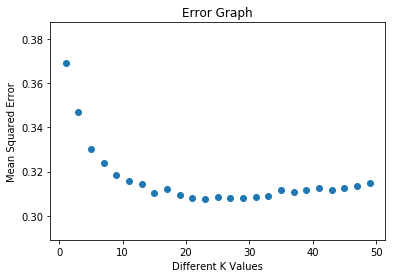

In [22]:
#Error graph for each k
plt.scatter(neighbors,MSE)
plt.xlabel('Different K Values')
plt.ylabel('Mean Squared Error')
plt.title('Error Graph')
plt.show()

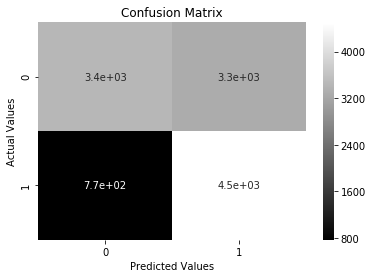

In [24]:
#Building the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(balanced_test_label,bow_knn_labels)
sns.heatmap(cnf,annot=True,cmap=plt.cm.gray)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()

## Conclusion:
### 1.The model provides correct values in 7942 cases out of 12000 cases.
### 2. The accuracy of the model is 66.18333333333334% which is average.

In [25]:
#Summary of BOW KNN
knn_summary = {'Type':['Model','Hyper Parameter','Train Error','Test Error'],'Value':['BOW KNN',str(optimal_k),str(100-score_t),str(100-score)]}
knn_summary_df = pd.DataFrame(knn_summary)
knn_summary_df

,Type,Value
0,Model,BOW KNN
1,Hyper Parameter,23
2,Train Error,23.837500000000006
3,Test Error,33.81666666666666


# TF-IDF Model

In [10]:
#Vectorizing the train data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_train_data = tfidf_model.fit_transform(balanced_train_data.CleanedText.values)
tfidf_train_data.shape

(28000, 20965)

In [12]:
#Transforming the test data
tfidf_test_data = tfidf_model.transform(balanced_test_data.CleanedText.values)
tfidf_test_data.shape

(12000, 20965)

In [14]:
from sklearn.cross_validation import cross_val_score
#Applying 10 fold cross validation for findinf optimal k
list_vals = list(range(0,50))
neighbors_tfidf = list(filter(lambda x:x%2!=0,list_vals))
cv_scores=[]
for i in neighbors_tfidf:
    knn_classifier = KNeighborsClassifier(i)
    scores = cross_val_score(knn_classifier,tfidf_train_data,balanced_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_k_tfidf = neighbors_tfidf[MSE.index(min(MSE))] 
optimal_k_tfidf

45

In [15]:
print("The optimal k found for Tf-IDF after 10 cross validations is --->"+str(optimal_k_tfidf))

The optimal k found for Tf-IDF after 10 cross validations is --->45


In [17]:
#Building the tfidf model with optimal k
tfidf_knn = KNeighborsClassifier(optimal_k_tfidf)
tfidf_knn.fit(tfidf_train_data,balanced_train_label)
tfidf_knn_data = tfidf_knn.predict(tfidf_test_data)

In [18]:
#Finding the accuracy score for test data in TFIDF model
from sklearn.metrics import accuracy_score
score = accuracy_score(tfidf_knn_data,balanced_test_label)*float(100)
print("The accuracy score for test data in TF-IDF model is --->"+str(score))

The accuracy score for test data in TF-IDF model is --->73.2


In [20]:
#Finding the train accurcy with 40% train data
tfidf_knn_40 = tfidf_train_data[0:8000,]
tfidf_knn_label_40 = balanced_train_label[0:8000]
#Getting the accuracy score for training data
tfidf_knn_trainl = tfidf_knn.predict(tfidf_knn_40)
score_t = accuracy_score(tfidf_knn_trainl,tfidf_knn_label_40)*float(100)
print("The accuracy score for train data in TF_IDF model is --->"+str(score_t))

The accuracy score for train data in TF_IDF model is --->78.66250000000001


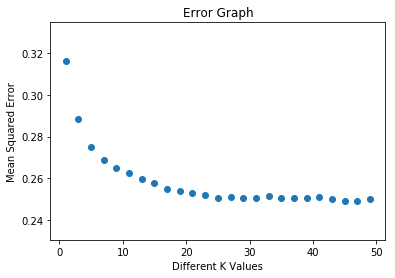

In [22]:
#Error graph for each k
plt.scatter(neighbors_tfidf,MSE)
plt.xlabel('Different K Values')
plt.ylabel('Mean Squared Error')
plt.title('Error Graph')
plt.show()

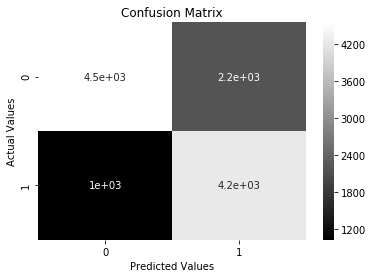

In [24]:
#Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_tfidf = confusion_matrix(balanced_test_label,tfidf_knn_data)
sns.heatmap(cnf_tfidf,cmap=plt.cm.gray,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [25]:
cnf_tfidf

array([[4545, 2185],
       [1031, 4239]], dtype=int64)

## Conclusion:
### 1.The model predicted correctly 8784 times out of 12000 times
### 2.The accuracy of the model is 73.2% which is better than the Bag Of Words Model

In [27]:
#Summary of TFIDF KNN
tfidf_sum = {'Type':['Model','Hyper Parameter','Train Error','Test Error'],'Value':['TFIDF KNN',str(optimal_k_tfidf),str(100-score_t),str(100-score)]}
tfidf_sum_df = pd.DataFrame(tfidf_sum)
tfidf_sum_df

,Type,Value
0,Model,TFIDF KNN
1,Hyper Parameter,45
2,Train Error,21.33749999999999
3,Test Error,26.799999999999997


# Word2Vec

In [19]:
#Filtering the sentences for using in word2vec
from gensim.models import Word2Vec
final_sentences = []
for sentence in balanced_sorted_data.Text.values:    
    sent = cleanHtml(sentence)       #Cleaning the html tags from the sentences
    filtered_sentence = []           #The filtered sentences to be stored in this list
    for word in sentence.split():    #Looping through each word
        for cleaned_word in cleanPunc(word).split():   #Cleaning the punctuations from each word
            if(cleaned_word.isalpha()):              
                filtered_sentence.append(cleaned_word.lower())   #Converting the cleaned word to lowercase
            else:
                continue
    final_sentences.append(filtered_sentence)      #Inserting each filtered sentence to the final list

In [12]:
len(final_sentences)

40000

In [13]:
#Training Word2Vec model with 70% of the total sentences
train_sentences = final_sentences[:28000]
w2v_model = Word2Vec(train_sentences,size = 50, workers = 4)

In [14]:
words = set(w2v_model.wv.vocab)
len(words)

10381

# Average Word2Vec

In [15]:
#Building model for average word2vec
sent_vectors = []
for sentence in final_sentences:    
    sentence_vectors = np.zeros(50)    #Building word vectors and initializing with 0
    count = 0   #Counting the total number of words in the sentence
    for word in sentence:
        try:
            count+=1           
            w2v = w2v_model.wv[word]    #Appling word2vec for each word
            sentence_vectors+=w2v        #Adding word2vec of each word to sentence vectors
        except:
            pass
    sentence_vectors/=count            #Computing average word2vec
    sent_vectors.append(sentence_vectors)

In [16]:
sent_vectors_df = pd.DataFrame(sent_vectors)
sent_vectors_df.shape

(40000, 50)

In [22]:
#Building 70% train data set
avgw2v_train_data = sent_vectors_df.iloc[0:28000,:]
avgw2v_train_label = balanced_data_score[0:28000]
print(avgw2v_train_data.shape)
avgw2v_train_label.shape

(28000, 50)


(28000,)

In [23]:
#Building the 30% test data set
avgw2v_test_data = sent_vectors_df.iloc[28000:40000,:]
avgw2v_test_label = balanced_data_score[28000:40000]
print(avgw2v_test_data.shape)
avgw2v_test_label.shape

(12000, 50)


(12000,)

In [24]:
#Applying 10fold cross validation to find the optimal K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
list_vals_avgw2v = list(range(0,50))
neighbors_avgw2v = list(filter(lambda x:x%2!=0,list_vals_avgw2v))
cv_scores=[]
for i in neighbors_avgw2v:
    knn_classifier = KNeighborsClassifier(i)
    scores = cross_val_score(knn_classifier,avgw2v_train_data,avgw2v_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_k_avgw2v = neighbors_avgw2v[MSE.index(min(MSE))] 
optimal_k_avgw2v

35

In [25]:
print("The optimal k found for Average Word2Vec after 10 cross validations is --->"+str(optimal_k_avgw2v))

The optimal k found for Average Word2Vec after 10 cross validations is --->35


In [26]:
#Building the avgw2v model with optimal k
avgw2v_knn = KNeighborsClassifier(optimal_k_avgw2v)
avgw2v_knn.fit(avgw2v_train_data,avgw2v_train_label)
avgw2v_knn_data = avgw2v_knn.predict(avgw2v_test_data)

In [27]:
#Finding the accuracy score for test data in Average Word2Vec model
from sklearn.metrics import accuracy_score
score = accuracy_score(avgw2v_knn_data,avgw2v_test_label)*float(100)
print("The accuracy score for test data in Average Word2Vec model is --->"+str(score))

The accuracy score for test data in Average Word2Vec model is --->77.075


In [28]:
#Finding the train accuracy with 40% train data
avgw2v_knn_40 = avgw2v_train_data.iloc[0:8000,]
avgw2v_knn_label = avgw2v_train_label[0:8000]
#Accuracy score for train data
avgw2v_knn_trainl = avgw2v_knn.predict(avgw2v_knn_40)
score_t = accuracy_score(avgw2v_knn_trainl,avgw2v_knn_label)*float(100)
print("The accuracy score for train data in Average Word2Vec model is --->"+str(score_t))

The accuracy score for train data in Average Word2Vec model is --->79.16250000000001


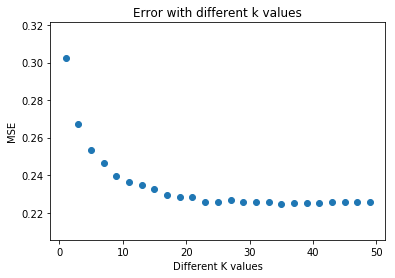

In [29]:
#Train error on various k values
plt.scatter(neighbors_avgw2v,MSE)
plt.xlabel('Different K values')
plt.ylabel('MSE')
plt.title('Error with different k values')
plt.show()

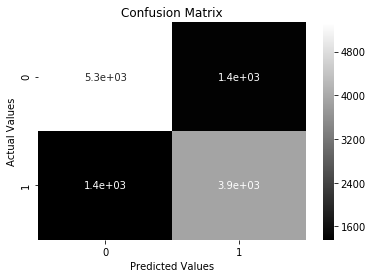

In [30]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_avgw2v = confusion_matrix(avgw2v_test_label,avgw2v_knn_data)
sns.heatmap(cnf_avgw2v,cmap=plt.cm.gray,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [31]:
cnf_avgw2v

array([[5334, 1396],
       [1355, 3915]], dtype=int64)

## Conclusion:
### 1. It predicts 9249 vlaues correctly out of 12000 values
### 2.The accuracy is  77.075%

In [32]:
#Summary of AVG W2V KNN
avgw2v_sum = {'Type':['Model','Hyper Parameter','Train Error','Test Error'],'Value':['AVG W2V KNN',str(optimal_k_avgw2v),str(100-score_t),str(100-score)]}
avgw2v_sum_df = pd.DataFrame(avgw2v_sum)
avgw2v_sum_df

,Type,Value
0,Model,AVG W2V KNN
1,Hyper Parameter,35
2,Train Error,20.83749999999999
3,Test Error,22.924999999999997


# Weighted TFIDF W2V

In [11]:
#Re-modeling TfidfVectorizer on train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_model = TfidfVectorizer()   #Initilaizing the TfidfVectorizer  
tf_idf_model_data = tf_idf_model.fit(balanced_train_data.Text.values)   #Training the vectorizer

In [13]:
#Building the vectors for final data
tf_idf_model_final = tf_idf_model.transform(balanced_sorted_data.Text.values)
tf_idf_model_final.shape

(40000, 33385)

In [21]:
#Building the Weighted TFIDF W2V
tf_features = tf_idf_model.get_feature_names()    #Retrieving the tfidf feature names
weighted_sentences = [];
row = 0;
for sentence in final_sentences:
    sum_vector = np.zeros(50)     #Building word vectors and initializing with 0
    weighted_sum = 0;             #Initializing the weighted sum to 0
    for word in sentence:         #Looping through each word
        try: 
            w2v = w2v_model.wv[word]         #Applying the word2vec model on each word
            tf_idf = tf_idf_model_final[row,tf_features.index(word)]      #Retrieving the tfidf value for the corresponding word
            sum_vector += (w2v*tf_idf)          #Computing tfidf weighted w2v
            weighted_sum += tf_idf              #Computing the total tfidf weight
        except:
            pass
    sum_vector/=weighted_sum              #Final tfidf weighted w2v
    weighted_sentences.append(sum_vector)
    row += 1 

In [22]:
#Converting the weighted sentences list to a DataFrame
weighted_df = pd.DataFrame(weighted_sentences) 
weighted_df.shape

(40000, 50)

In [23]:
#Building 70% train data set
tfidfw2v_train_data = weighted_df.iloc[0:28000,:]
tfidfw2v_train_label = balanced_data_score[0:28000]
print(tfidfw2v_train_data.shape)
tfidfw2v_train_label.shape

(28000, 50)


(28000,)

In [24]:
#Building 30% test data set
tfidfw2v_test_data = weighted_df.iloc[28000:40000]
tfidfw2v_test_label = balanced_data_score[28000:40000]
print(tfidfw2v_test_data.shape)
tfidfw2v_test_data.shape

(12000, 50)


(12000, 50)

In [25]:
#Applying 10fold cross validation on tfidfw2v model to find the optimal K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
list_vals_tfidfw2v = list(range(0,50))
neighbors_tfidfw2v = list(filter(lambda x:x%2!=0,list_vals_tfidfw2v))
cv_scores=[]
for i in neighbors_tfidfw2v:
    knn_classifier = KNeighborsClassifier(i)
    scores = cross_val_score(knn_classifier,tfidfw2v_train_data,tfidfw2v_train_label,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
optimal_k_tfidfw2v = neighbors_tfidfw2v[MSE.index(min(MSE))] 
optimal_k_tfidfw2v

49

In [26]:
print("The optimal k found for Weighted TFIDF Word2Vec after 10 cross validations is --->"+str(optimal_k_tfidfw2v))

The optimal k found for Weighted TFIDF Word2Vec after 10 cross validations is --->49


In [27]:
#Building the tfidfw2v model with optimal k
tfidfw2v_knn = KNeighborsClassifier(optimal_k_tfidfw2v)
tfidfw2v_knn.fit(tfidfw2v_train_data,tfidfw2v_train_label)
tfidfw2v_knn_data = tfidfw2v_knn.predict(tfidfw2v_test_data)

In [28]:
#Finding the accuracy score for test data in TFIDF model
from sklearn.metrics import accuracy_score
score = accuracy_score(tfidfw2v_knn_data,tfidfw2v_test_label)*float(100)
print("The accuracy score for test data in Weighted TFIDF Word2Vec model is --->"+str(score))

The accuracy score for test data in Weighted TFIDF Word2Vec model is --->75.94999999999999


In [29]:
#Finding the train accuracy with 40% train data
tfidfw2v_knn_40 = tfidfw2v_train_data.iloc[0:8000,]
tfidfw2v_knn_label = tfidfw2v_train_label[0:8000]
#Accuracy score for train data
tfidfw2v_knn_trainl = tfidfw2v_knn.predict(tfidfw2v_knn_40)
score_t = accuracy_score(tfidfw2v_knn_trainl,tfidfw2v_knn_label)*float(100)
print("The accuracy score for train data in Average Word2Vec model is --->"+str(score_t))

The accuracy score for train data in Average Word2Vec model is --->77.875


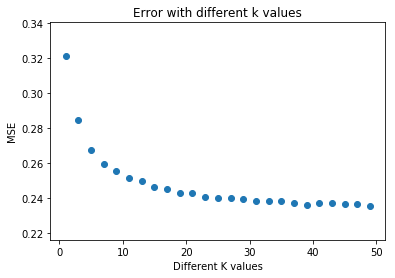

In [30]:
#Train error on various k values
plt.scatter(neighbors_tfidfw2v,MSE)
plt.xlabel('Different K values')
plt.ylabel('MSE')
plt.title('Error with different k values')
plt.show()

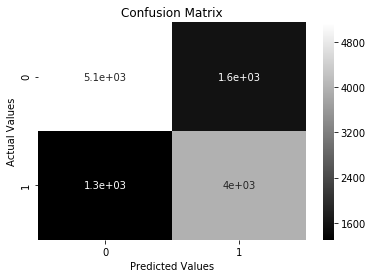

In [31]:
#Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_tfidfw2v = confusion_matrix(tfidfw2v_test_label,tfidfw2v_knn_data)
sns.heatmap(cnf_tfidfw2v,cmap=plt.cm.gray,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [32]:
cnf_tfidfw2v

array([[5145, 1585],
       [1301, 3969]], dtype=int64)

# Conclusion

### 1.The Weighted TFIDF Word2Vec model on KNeighborsClassifier predicts 9114 times correctly out of 12000 times
### 2.Accuracy is 75.94999999999999%

In [33]:
#Summary of TFIDF W2V KNN
tfidfw2v_sum = {'Type':['Model','Hyper Parameter','Train Error','Test Error'],'Value':['TFIDF W2V KNN',str(optimal_k_tfidfw2v),str(100-score_t),str(100-score)]}
tfidfw2v_sum_df = pd.DataFrame(tfidfw2v_sum)
tfidfw2v_sum_df

,Type,Value
0,Model,TFIDF W2V KNN
1,Hyper Parameter,49
2,Train Error,22.125
3,Test Error,24.05000000000001


# Final Summary

In [5]:
#Final Summary of all the models
summary = {'Model':['Bag Of Words','Tfidf','Average Word2Vec','Tfidf W2V KNN'],'Hyper Parameter(k)':['23','45','35','49'],'Train Error':['23.837500000000006','21.33749999999999','20.83749999999999','22.125'],'Test Error':['33.81666666666666','26.799999999999997','22.924999999999997','24.05000000000001']}
summary_df = pd.DataFrame(summary)
summary_df

,Model,Hyper Parameter(k),Train Error,Test Error
0,Bag Of Words,23,23.837500000000006,33.81666666666666
1,Tfidf,45,21.33749999999999,26.799999999999997
2,Average Word2Vec,35,20.83749999999999,22.924999999999997
3,Tfidf W2V KNN,49,22.125,24.05000000000001


## Average Word2Vec provided the best accuracy with 77.075%
